In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Toyota_Corolla.csv',encoding ='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [9]:
data.shape

(1436, 38)

In [6]:
data2 =pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
data2[data2.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
data3=data2.drop_duplicates().reset_index(drop=True)
data3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [29]:
data3.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Model Preparation

In [30]:
data3.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


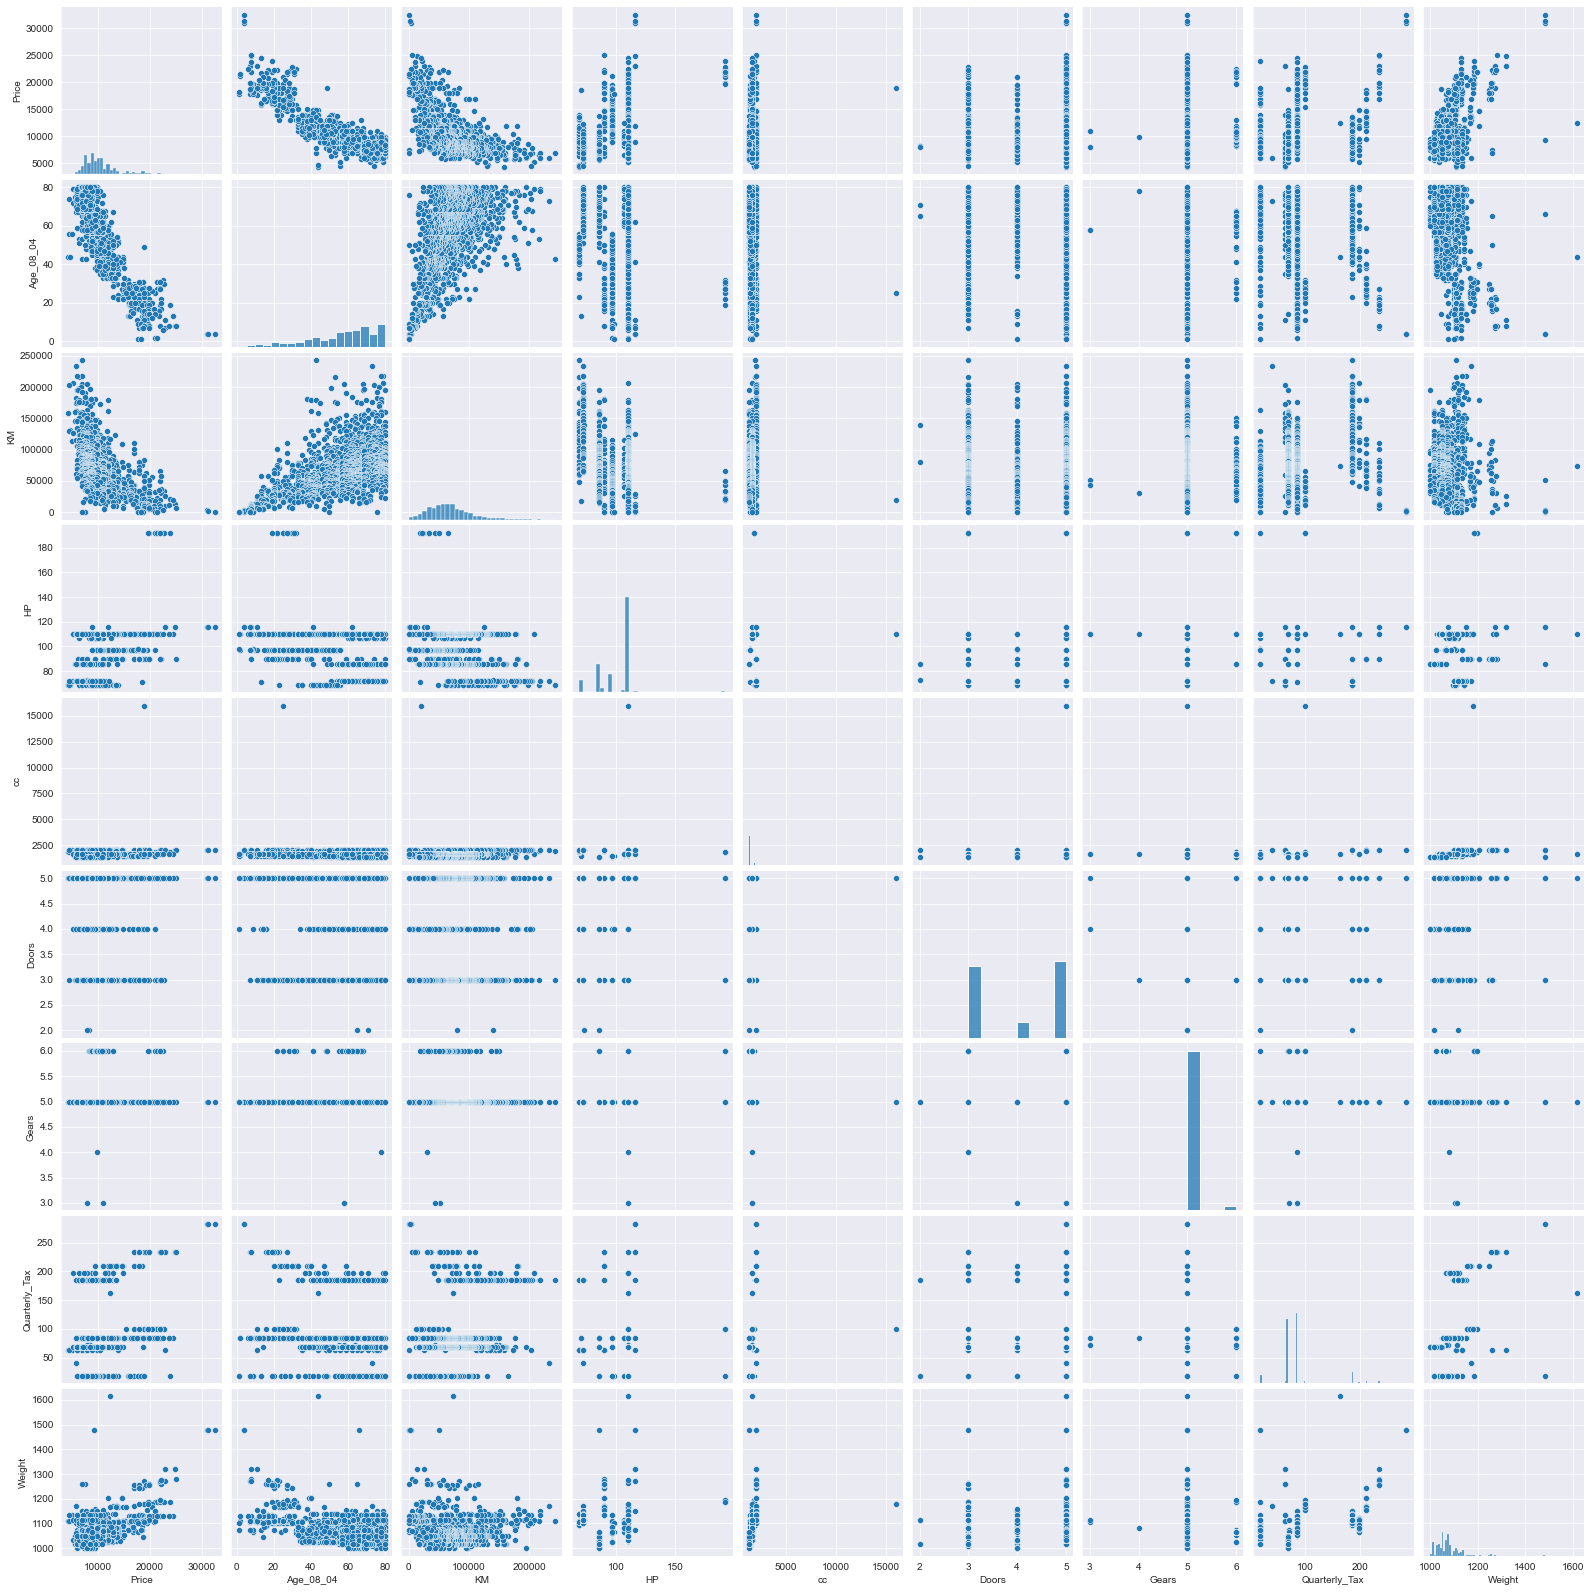

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

In [8]:
data3 = data3.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'Tax'},axis=1)

In [60]:
model = smf.ols("Price ~Age+KM+HP+CC+Doors+Gears+Tax+Weight",data=data3).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:56:02   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [44]:
np.round(model.pvalues,5)

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
Tax          0.00329
Weight       0.00000
dtype: float64

In [45]:
model2 = smf.ols("Price ~ CC",data=data3).fit()

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.29e-06
Time:                        21:04:14   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
model3 = smf.ols("Price ~ Doors",data=data3).fit()

In [48]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.40e-12
Time:                        21:05:19   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model4 = smf.ols("Price ~ CC+Doors",data=data3).fit()

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.55e-15
Time:                        21:06:21   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF

In [52]:
rsq_a = smf.ols("Age ~ KM+HP+CC+Doors+Gears+Tax+Weight",data=data3).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_k = smf.ols("KM ~ Age+HP+CC+Doors+Gears+Tax+Weight",data=data3).fit().rsquared
vif_k = 1/(1-rsq_k)

rsq_h = smf.ols("HP ~ KM+Age+CC+Doors+Gears+Tax+Weight",data=data3).fit().rsquared
vif_h = 1/(1-rsq_h)

rsq_c = smf.ols("CC ~ KM+HP+Age+Doors+Gears+Tax+Weight",data=data3).fit().rsquared
vif_c = 1/(1-rsq_c)

rsq_d = smf.ols("Doors ~ KM+HP+CC+Age+Gears+Tax+Weight",data=data3).fit().rsquared
vif_d = 1/(1-rsq_d)

rsq_g = smf.ols("Gears ~ KM+HP+CC+Doors+Age+Tax+Weight",data=data3).fit().rsquared
vif_g = 1/(1-rsq_g)

rsq_t = smf.ols("Tax ~ KM+HP+CC+Doors+Gears+Age+Weight",data=data3).fit().rsquared
vif_t = 1/(1-rsq_t)

rsq_w = smf.ols("Weight ~ KM+HP+CC+Doors+Gears+Tax+Age",data=data3).fit().rsquared
vif_w = 1/(1-rsq_w)

d1 = {'Variable':['Age','KM','HP','CC','Doors','Gears','Tax','Weight'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_t,vif_w]}
Vif_Frame = pd.DataFrame(d1)
Vif_Frame

,Variable,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.295375
7,Weight,2.487180


## Residual Analysis

In [62]:
model.resid.min()

-9303.070391075009

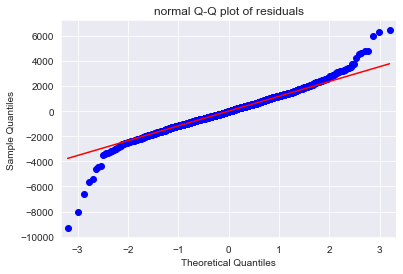

In [64]:
sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()

In [65]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [66]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [67]:
# Test for Homoscedasticity
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

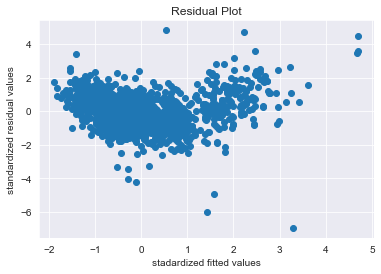

In [68]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('stadardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [69]:
# Residuals vs Regressors

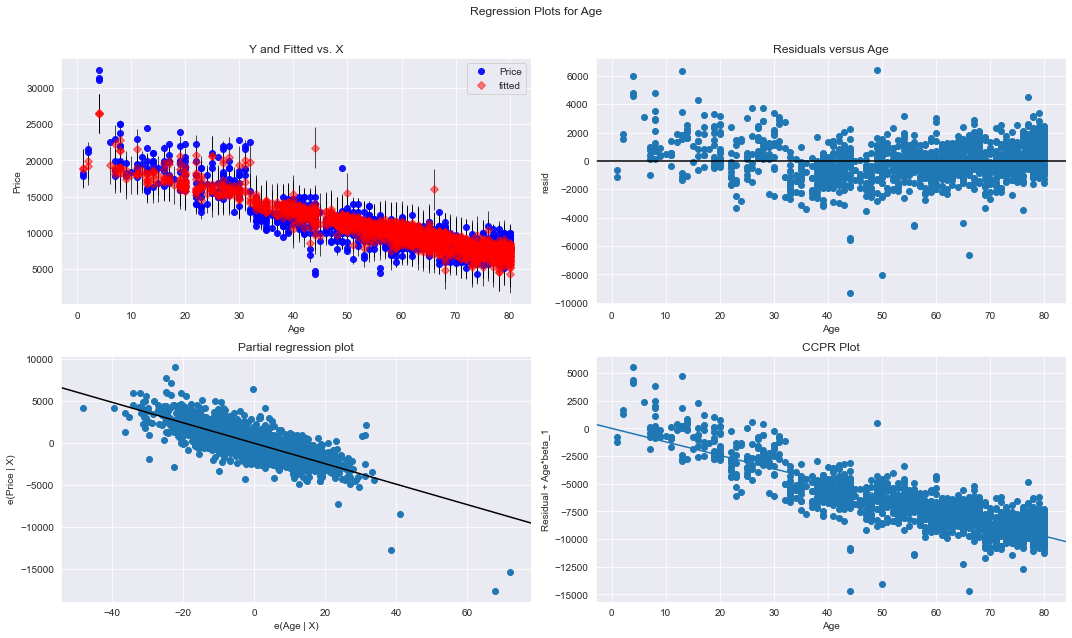

In [70]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

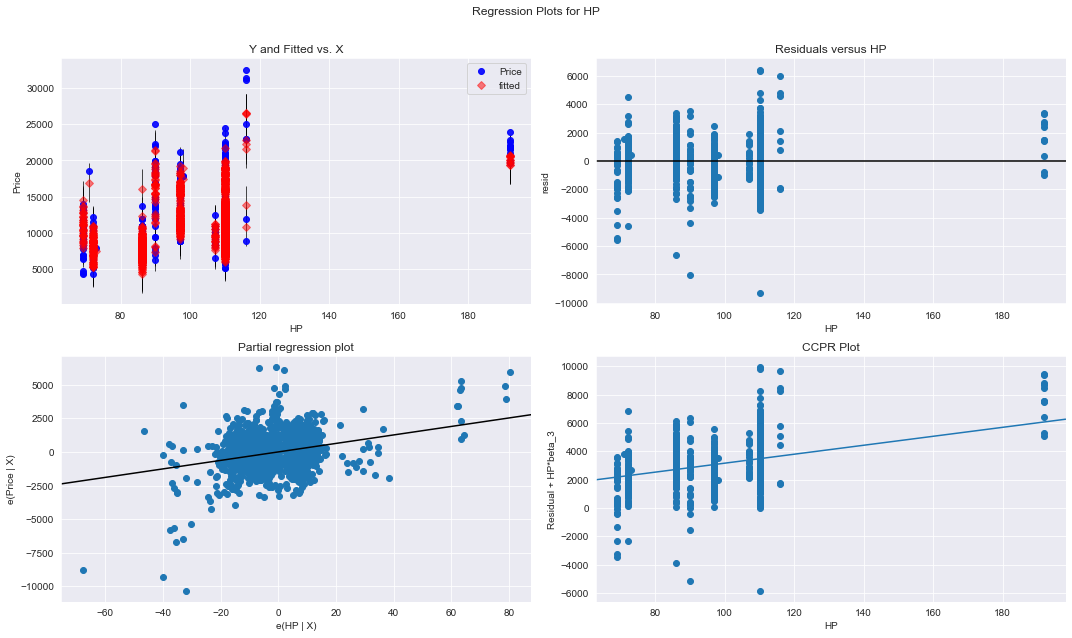

In [71]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

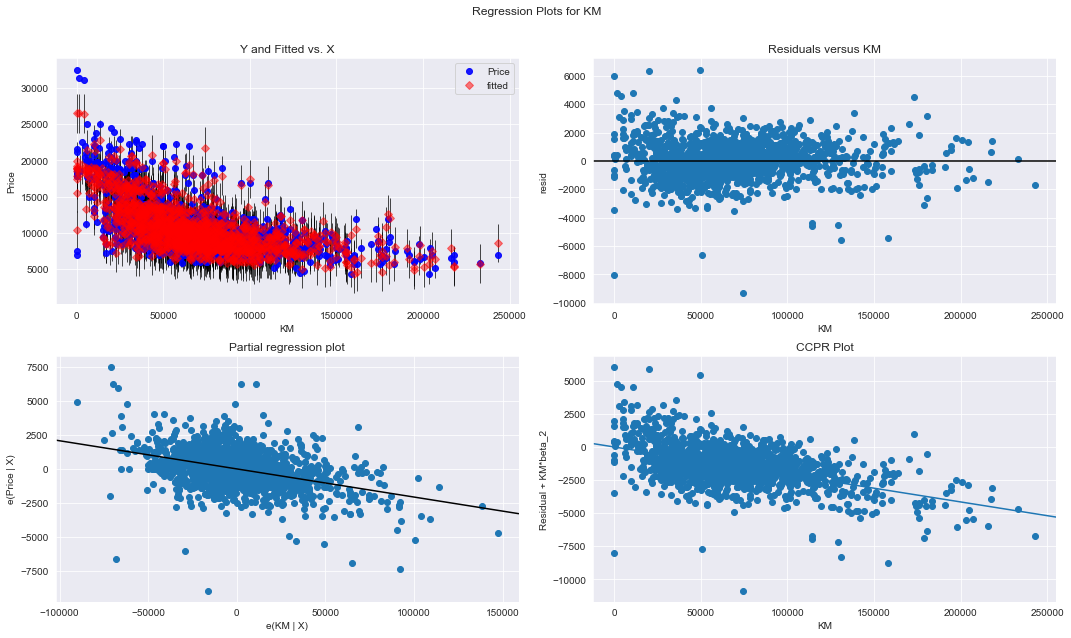

In [72]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

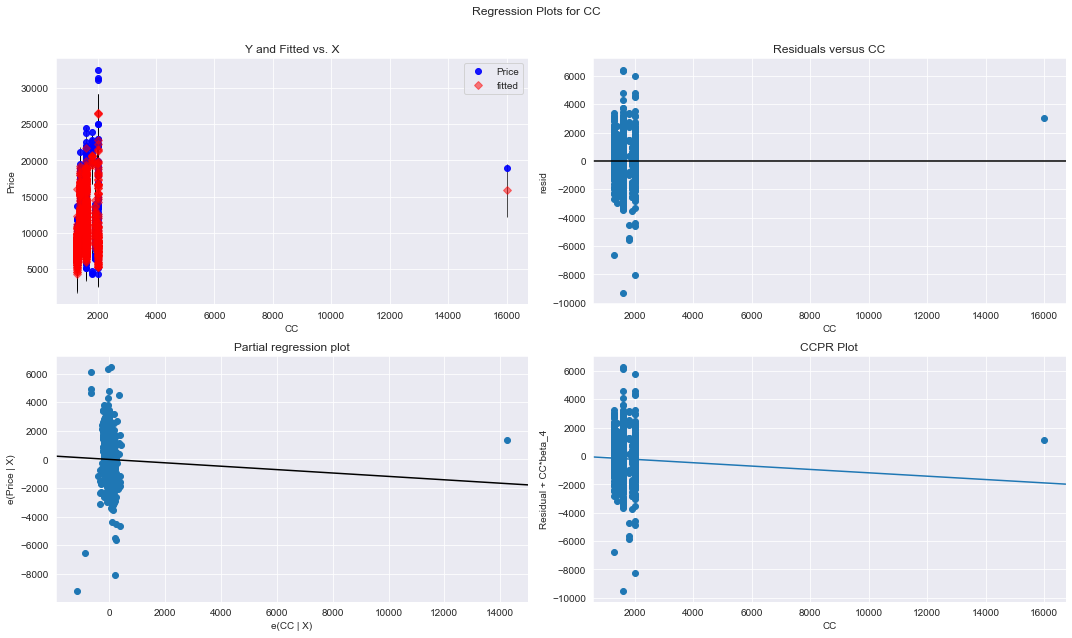

In [73]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

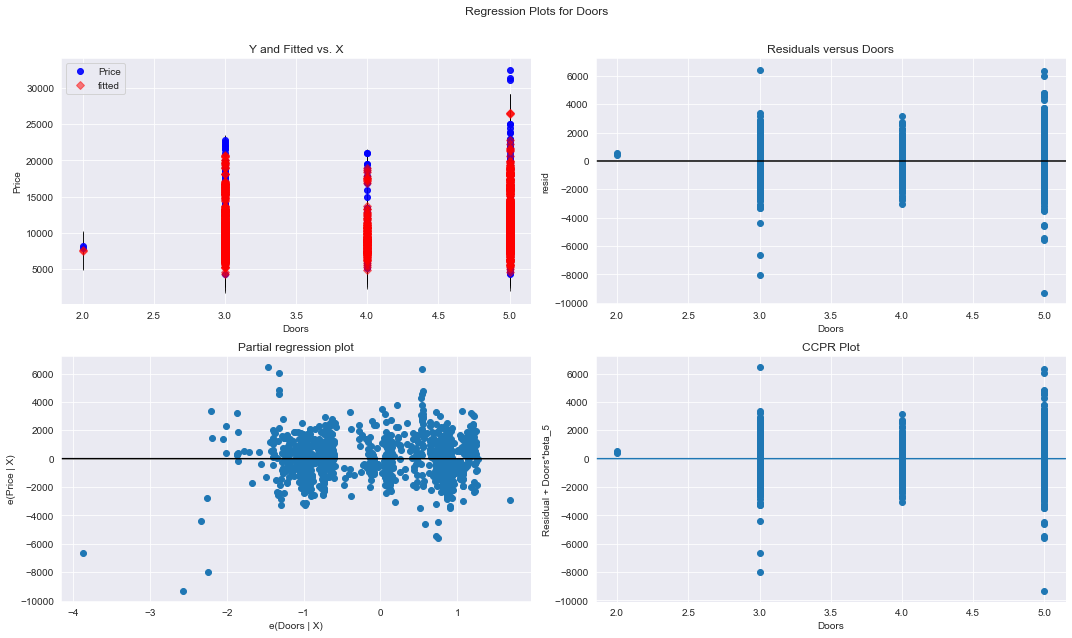

In [74]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

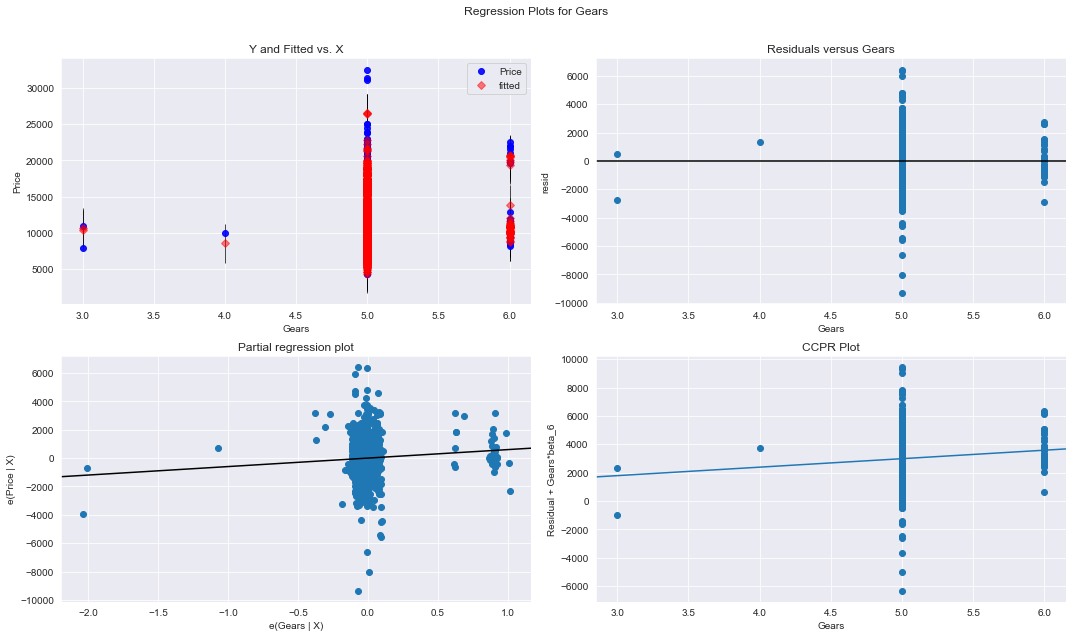

In [75]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

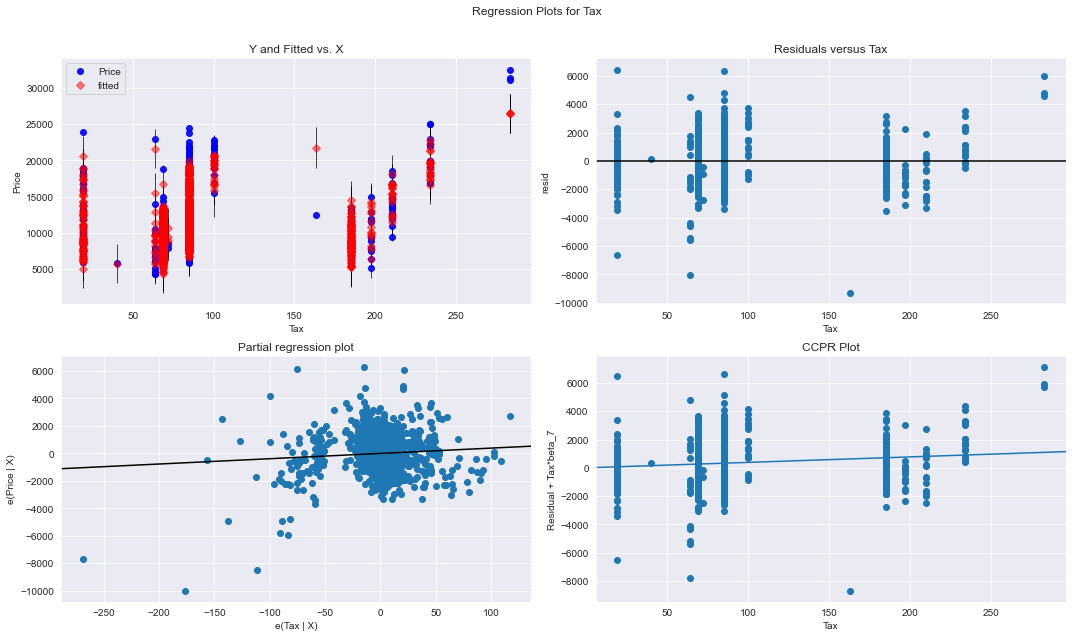

In [76]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'Tax',fig=fig)
plt.show()

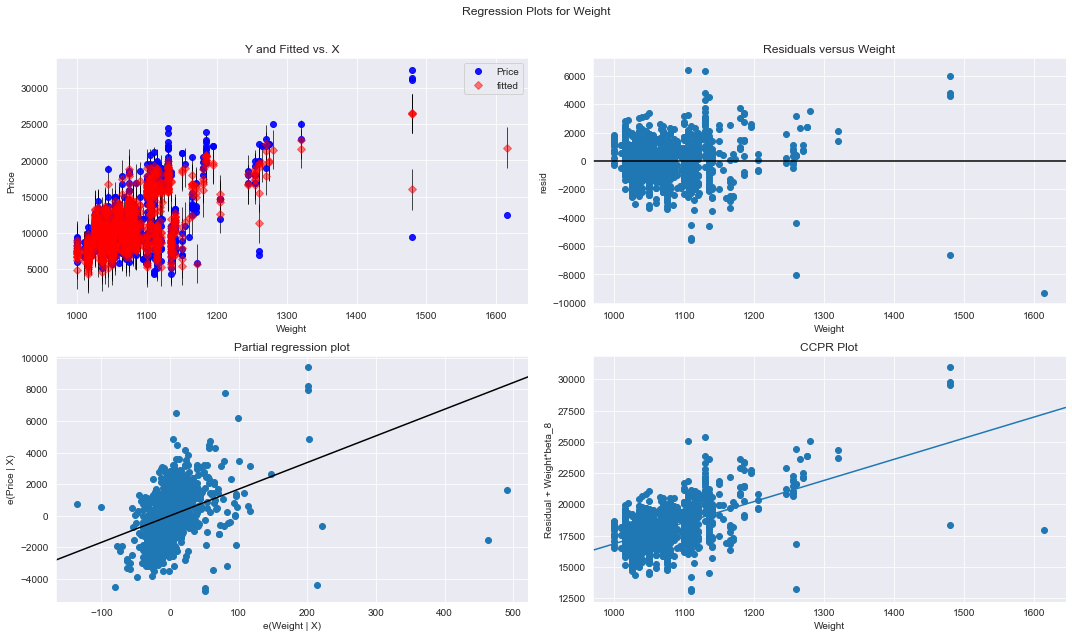

In [77]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Test for Outliers or Influencers

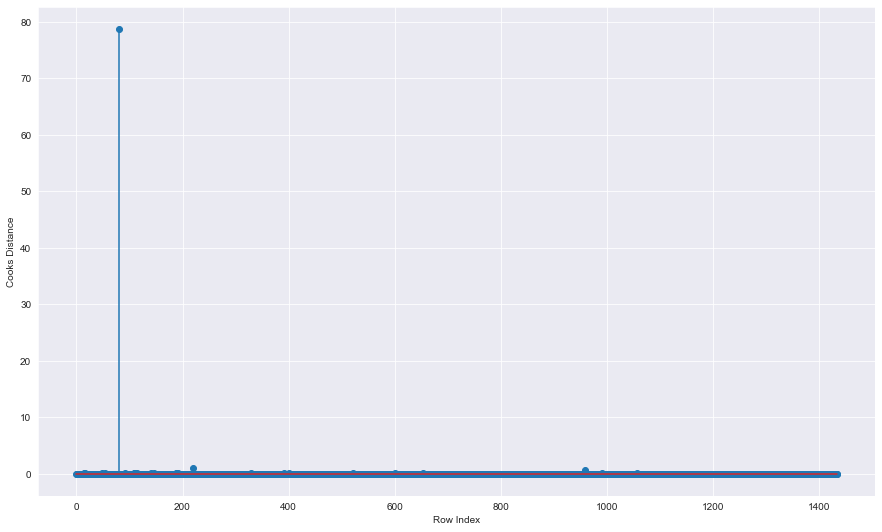

In [78]:
# Cook's Distance
(c,_) = model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
np.argmax(c),np.max(c)

(80, 78.7295058224916)

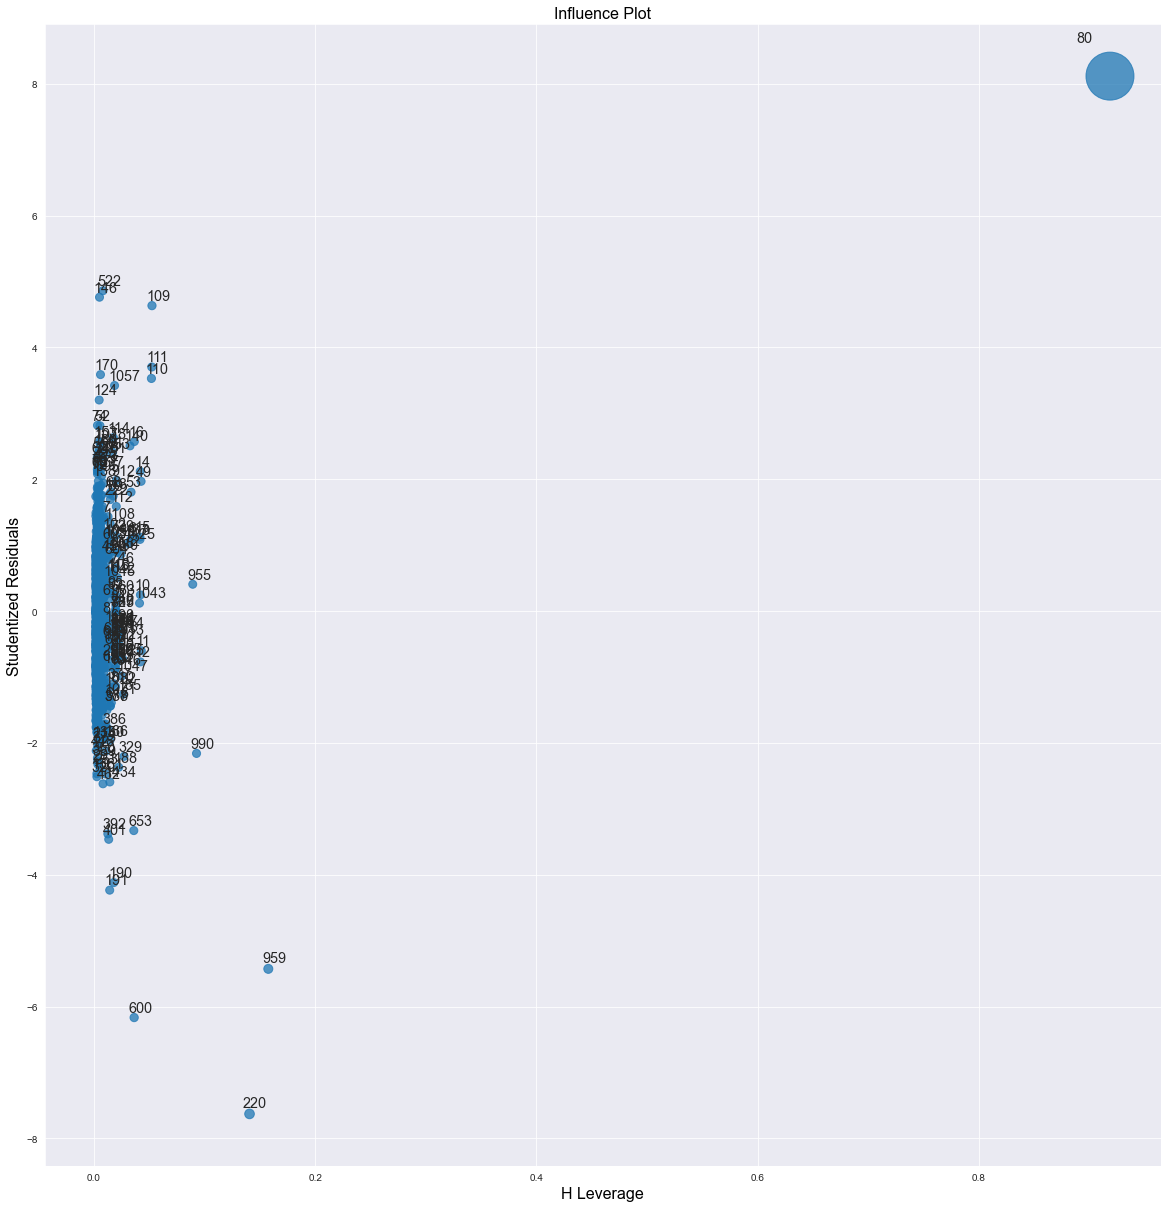

In [86]:
# Influence Plot
fig,a = plt.subplots(figsize=(20,21))
fig = influence_plot(model,ax=a)

In [87]:
k = data3.shape[1]
n = data3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [88]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model

In [9]:
data_new = data3.copy()

In [10]:
data_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
data_new = data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)

In [12]:
new_model = smf.ols("Price ~Age+KM+HP+CC+Gears+Tax+Weight",data=data_new).fit()

In [93]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:07:04   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
Age         -120.5104      2.561    -47.058      0.000    -125.534    -115.487
KM            -0.0178      0.001    -13.986      0.000      -0.020      -0.015
HP            39.0416      2.899     13.468      0.000      33.355      44.728
CC            -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears        552.2590    189.176      2.919      0.004     181.166     923.352
Tax            8.9718      1.426      6.293      0.000       6.175      11.768
Weight        19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

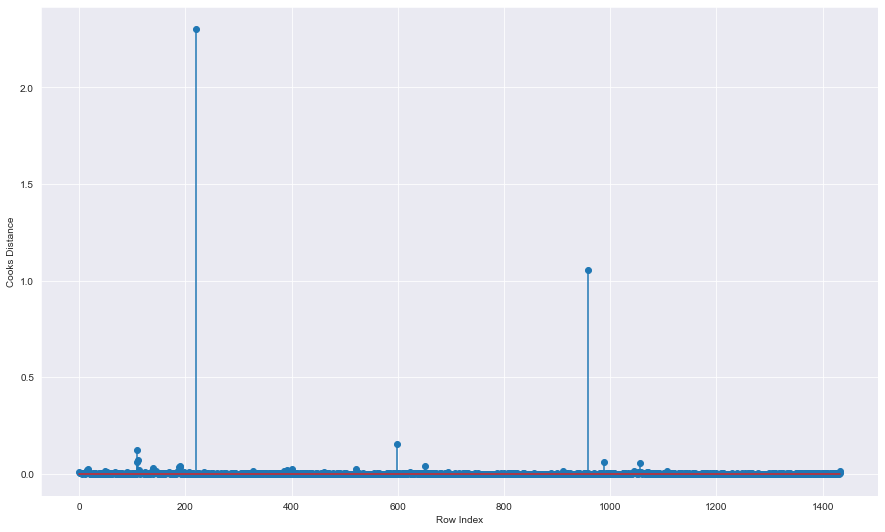

In [94]:
(c,_) = new_model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data_new)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [95]:
np.argmax(c),np.max(c)

(219, 2.3039534822945362)

In [96]:
data_new = data_new.drop(data_new.index[[219]],axis=0).reset_index(drop=True)

In [97]:
new_model = smf.ols("Price ~Age+KM+HP+CC+Gears+Tax+Weight",data=data_new).fit()

In [98]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:10:28   Log-Likelihood:                -12271.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1425   BIC:                         2.460e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.017e+04   1399.023     -7.273      0.000   -1.29e+04   -7430.051
Age         -116.7044      2.510    -46.489      0.000    -121.629    -111.780
KM            -0.0174      0.001    -14.040      0.000      -0.020      -0.015
HP            38.7663      2.807     13.809      0.000      33.259      44.273
CC            -3.1394      0.304    -10.329      0.000      -3.736      -2.543
Gears        548.8367    183.201      2.996      0.003     189.464     908.210
Tax            7.9902      1.384      5.772      0.000       5.275      10.706
Weight        24.3939      1.143     21.347      0.000      22.152      26.635
==============================================================================
Omnibus:                      179.368   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.479
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       7.911   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

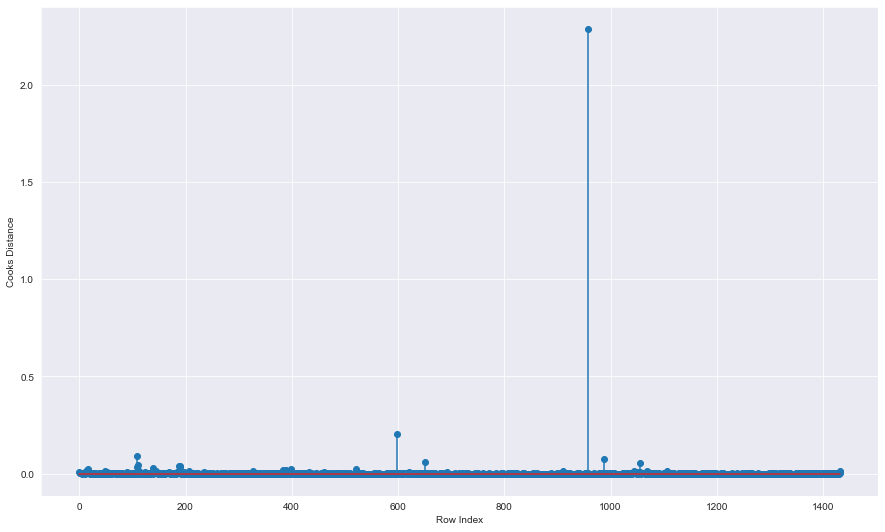

In [99]:
(c,_) = new_model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data_new)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
np.argmax(c),np.max(c)

(957, 2.289048255297341)

In [109]:
data_new = data_new.drop(data_new.index[[957]],axis=0).reset_index(drop=True)

In [110]:
new_model = smf.ols("Price ~Age+KM+HP+CC+Gears+Tax+Weight",data=data_new).fit()

In [111]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:14:09   Log-Likelihood:                -12245.
No. Observations:                1430   AIC:                         2.451e+04
Df Residuals:                    1422   BIC:                         2.455e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.015e+04   1398.874     -7.256      0.000   -1.29e+04   -7406.535
Age         -116.6726      2.512    -46.449      0.000    -121.600    -111.745
KM            -0.0174      0.001    -14.063      0.000      -0.020      -0.015
HP            38.8753      2.807     13.847      0.000      33.368      44.383
CC            -3.1335      0.304    -10.312      0.000      -3.730      -2.537
Gears        545.0268    183.169      2.976      0.003     185.716     904.338
Tax            8.0094      1.384      5.787      0.000       5.295      10.724
Weight        24.3721      1.143     21.331      0.000      22.131      26.613
==============================================================================
Omnibus:                      179.377   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1458.001
Skew:                          -0.270   Prob(JB):                         0.00
Kurtosis:                       7.917   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

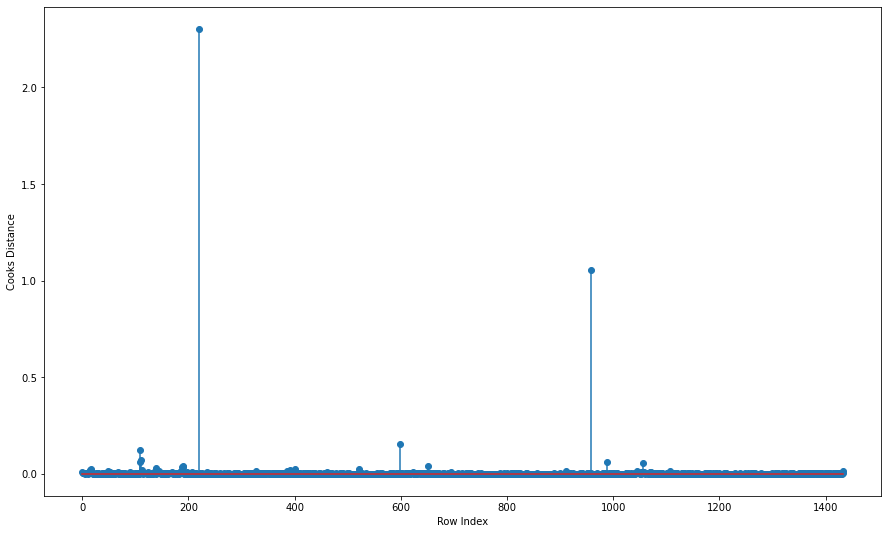

In [13]:
(c,_) = new_model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data_new)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [113]:
np.argmax(c),np.max(c)

(956, 2.2866080703523783)

In [14]:
data_new = data_new.drop(data_new.index[[956]],axis=0).reset_index(drop=True)


In [15]:
new_model = smf.ols("Price ~Age+KM+HP+CC+Gears+Tax+Weight",data=data_new).fit()

In [116]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1538.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -12197.
No. Observations:                1429   AIC:                         2.441e+04
Df Residuals:                    1421   BIC:                         2.445e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.441e+04   1438.970    -10.011      0.000   -1.72e+04   -1.16e+04
Age         -112.4169      2.487    -45.194      0.000    -117.296    -107.537
KM            -0.0172      0.001    -14.325      0.000      -0.020      -0.015
HP            36.0006      2.749     13.097      0.000      30.609      41.393
CC            -3.6494      0.301    -12.127      0.000      -4.240      -3.059
Gears        576.7774    178.175      3.237      0.001     227.263     926.292
Tax            5.5139      1.374      4.014      0.000       2.819       8.209
Weight        29.1976      1.232     23.703      0.000      26.781      31.614
==============================================================================
Omnibus:                      109.778   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.061
Skew:                          -0.058   Prob(JB):                    9.90e-125
Kurtosis:                       6.095   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

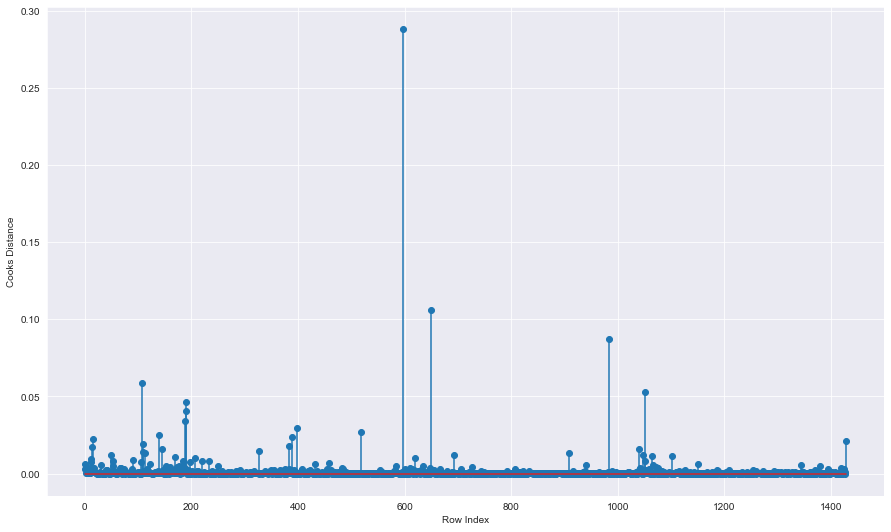

In [117]:
(c,_) = new_model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data_new)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [118]:
# No C > 0.5, Hence this is the final model

In [120]:
new_model.rsquared,new_model.aic

(0.8833751783003323, 24409.843956918954)

## Prediction of a new data point

In [16]:
pred_data = pd.DataFrame({'Age':35,'KM':75000,'HP':200,'CC':2200,'Doors':5,'Gears':6,'Tax':140,'Weight':1200},index=[1])
pred_data

,Age,KM,HP,CC,Doors,Gears,Tax,Weight
1,35,75000,200,2200,5,6,140,1200


In [17]:
new_model.predict(pred_data)

1    18952.800248
dtype: float64

In [18]:
new_model.predict(data_new)

0       16481.381339
1       16018.452169
2       16454.963646
3       16101.744295
4       15888.473768
            ...     
1428     8950.807749
1429     8418.146107
1430     8574.054102
1431     8696.354199
1432     9983.365669
Length: 1433, dtype: float64